**Import Packages**

In [1]:
!pip install uv
!uv pip install nixtla==0.6.1 --system

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.4 MB/s eta 0:00:00
Using Python 3.10.12 environment at /usr
Resolved 25 packages in 569ms
⠙ Preparing packages... (0/2)
⠙ Preparing packages... (0/2)
⠙ Preparing packages... (0/2)
nixtla     ------------------------------     0 B/27.64 KiB
⠙ Preparing packages... (0/2)
nixtla     ------------------------------ 14.92 KiB/27.64 KiB
⠙ Preparing packages... (0/2)
nixtla     ------------------------------ 14.92 KiB/27.64 KiB
⠙ Preparing packages... (0/2)
nixtla     ------------------------------ 14.92 KiB/27.64 KiB
⠙ Preparing packages... (0/2)
nixtla     ------------------------------ 27.64 KiB/27.64 KiB
⠙ Preparing packages... (0/2)
Prepared 2 packages in 24ms
Installed 2 packages in 1ms
 + nixtla==0.6.1
 + utilsforecast==0.2.7


In [2]:
from google.colab import userdata
from nixtla import NixtlaClient
nixtla_client = NixtlaClient(api_key=userdata.get('NIXTLA_API_KEY'))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**Load Data**

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/peyton_manning.csv')

df.head()

,timestamp,value
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


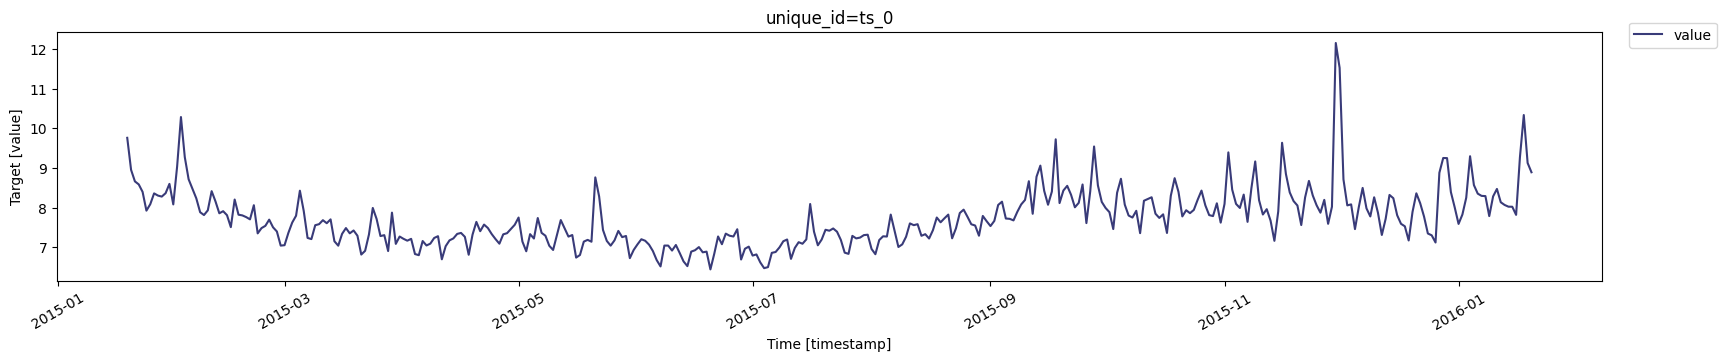

In [4]:
nixtla_client.plot(
    df,
    time_col='timestamp',
    target_col='value',
    max_insample_length=365
)

**Anomaly detection**

In [5]:
anomalies_df = nixtla_client.detect_anomalies(
    df,
    time_col='timestamp',
    target_col='value',
    freq='D'
)

anomalies_df.head()

,timestamp,value,TimeGPT,TimeGPT-hi-99,TimeGPT-lo-99,anomaly
0,2008-01-07,8.846785,9.491854,10.752017,8.231690,False
1,2008-01-08,8.430545,8.597006,9.857169,7.336843,False
2,2008-01-09,8.248267,8.404151,9.664314,7.143988,False
3,2008-01-10,8.281724,8.318853,9.579017,7.058690,False
4,2008-01-11,8.292799,8.227771,9.487934,6.967608,False


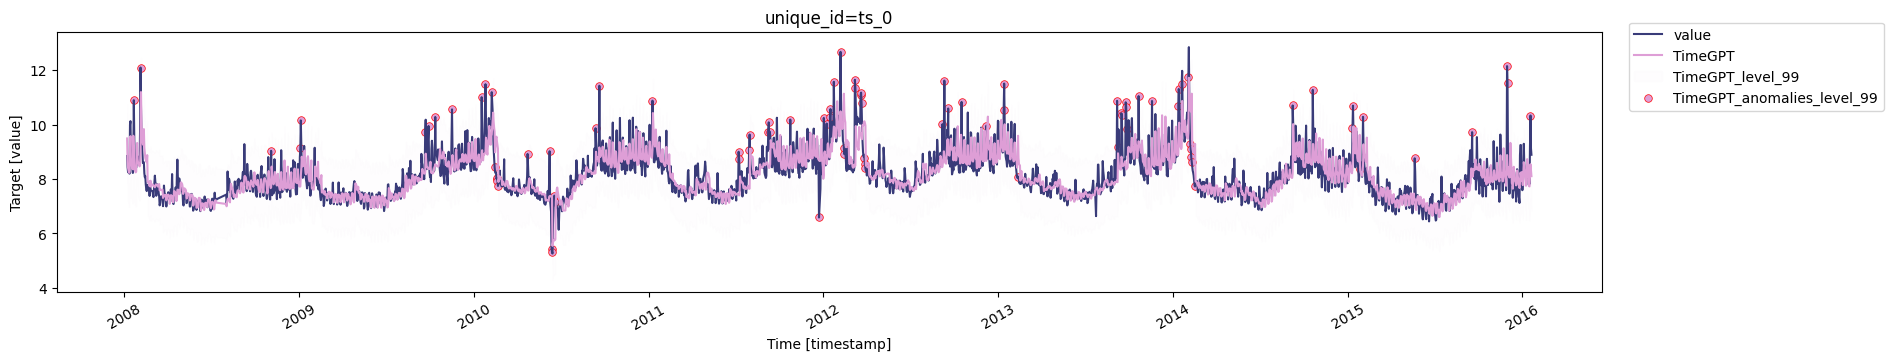

In [6]:
nixtla_client.plot(
    df,
    anomalies_df,
    time_col='timestamp',
    target_col='value'
)

**Anomaly detection with exogenous features**

In [12]:
anomalies_df_x = nixtla_client.detect_anomalies(
    df, time_col='timestamp',
    target_col='value',
    freq='D',
    date_features=['month', 'year'],
)

<Axes: ylabel='features'>

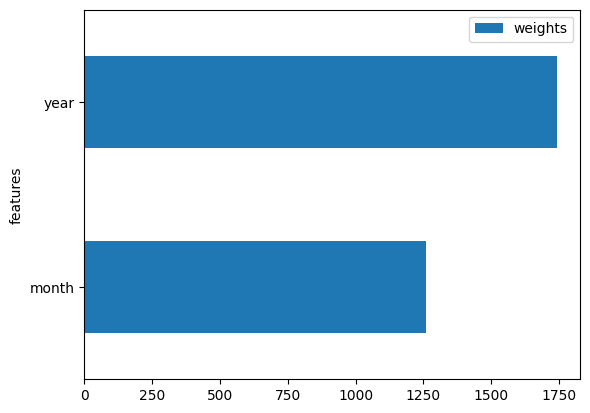

In [8]:
nixtla_client.weights_x.plot.barh(x='features', y='weights')

**Modifying the confidence intervals**

In [9]:
anomalies_df = nixtla_client.detect_anomalies(
    df,
    time_col='timestamp',
    target_col='value',
    freq='D',
    level=70
)

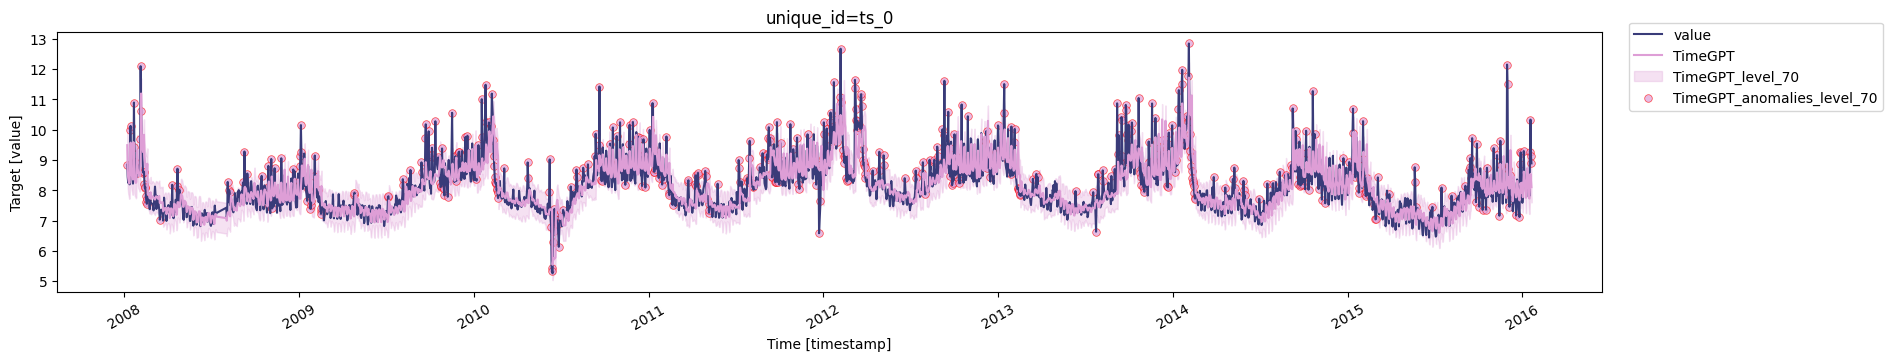

In [10]:
nixtla_client.plot(
    df,
    anomalies_df,
    time_col='timestamp',
    target_col='value'
)